In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

import random

df = pd.read_csv('data/airlines.csv')

df=df.sample(frac=1).reset_index(drop=True)

Y=df['Percentage On Time Arrivals']
X=df.drop(['Airline', 'Percentage On Time Arrivals'], axis=1)

In [2]:
#insert exercise here
import random
def sgd(x,y,alpha,tolerance,iterations = 20000):
    iter = 0
    converged = False
    m = x.shape[0]

    t0 = 0
    t1 = 1
    t0_list = []
    t1_list = []
    loss_l = []
    
    while not converged:
        i = random.randint(0,len(x)-1)
        J = sum([(t0+t1*x[i]-y[i])**2 for i in range(m)])

        the0 = (t0 + t1*x[i]- y[i])
        the1 = (t0 + t1*x[i] - y[i])*x[i]

        temp0 = t0 - alpha*the0
        temp1 = t1 - alpha*the1

        t0 = temp0
        t0_list.append(t0)
        t1 = temp1
        t1_list.append(t1)

        error = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])
        if abs(J-error) <= tolerance:
            converged = True
        iter += 1  # update iter
        
        if iter % 100 == 0:
            loss_l.append(error)
        if iter == iterations:
            converged = True

        J = error   # update error
    print(f"iterations: {iter}")
    print(t0_list[-1],t1_list[-1])
    #print(loss_l)
    return loss_l,(t0_list[-1],t1_list[-1])
    return t0_list[-1],t1_list[-1]

iterations: 20000
86.96203387915219 -2.0523759370615355


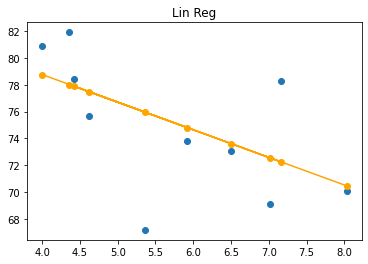

Text(0.5, 1.0, 'Loss of SGD')

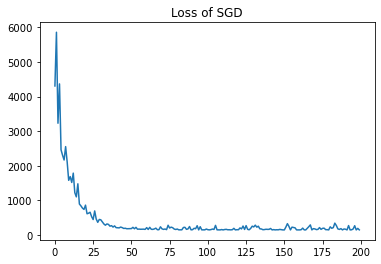

In [3]:
x = df['Mishandled baggage (per 1000 passengers)']
y = df['Percentage On Time Arrivals']
result = sgd(x,y,0.01,0.0001)
result0 = float(result[1][0])
result1 = float(result[1][1])
loss = result[0]

y_pre = x*result1 + result0
plt.title('Lin Reg')
plt.scatter(x, y)
plt.plot(x, y_pre, color='Orange')
plt.scatter(x, y_pre, color='Orange')
plt.show()
x = np.arange(len(loss))
plt.plot(x,loss)
plt.title('Loss of SGD')

In [4]:
def gradient_descent(X,Y,alpha=0.05,tol=0.0000001):
    m = len(Y)
    theta0=100
    theta1=100
    count = 0
    loss_l = []
    def gradientx(theta0,theta1):
        value = 0
        for i in range(0,m):
            value += theta0+theta1*X[i]-Y[i]
        value = value/m
        return value

    def gradienty(theta0,theta1):
        value = 0
        for i in range(0,m):
            value += (theta0+theta1*X[i]-Y[i])*X[i]
        value = value/m
        return value

    newtheta0 = theta0-alpha*gradientx(theta0, theta1)
    newtheta1 = theta1-alpha*gradienty(theta0, theta1)
    while abs(newtheta1-theta1)> tol:
        nowa = newtheta0-alpha*gradientx(newtheta0,newtheta1)
        nowb = newtheta1-alpha*gradienty(newtheta0, newtheta1)
        newtheta0=nowa
        newtheta1=nowb
        nowa = theta0-alpha*gradientx(theta0, theta1)
        nowb = theta1-alpha*gradienty(theta0, theta1)
        theta0=nowa
        theta1=nowb
        count += 1
        if count % 100 == 0:
            loss_l.append(abs(newtheta1-theta1))
    return newtheta0,newtheta1,count,loss_l

x = df['Mishandled baggage (per 1000 passengers)']
y = df['Percentage On Time Arrivals']

gradient_descent(x,y)

(87.20264410238664,
 -2.1524056672134826,
 3931,
 [0.0012812175536704995,
  0.0010008758588193611,
  0.0007818777829338153,
  0.0006107978947160753,
  0.0004771513864936239,
  0.0003727475939272473,
  0.0002911880227367547,
  0.00022747421034097215,
  0.00017770138992290185,
  0.00013881918277247607,
  0.00010844465264892023,
  8.471626509320984e-05,
  6.617980136791601e-05,
  5.169923513692609e-05,
  4.0387109942141564e-05,
  3.1550150503711905e-05,
  2.4646774634984325e-05,
  1.9253901804905382e-05,
  1.504102424254583e-05,
  1.1749951388750901e-05,
  9.178986443814097e-06,
  7.170565167857745e-06,
  5.601599385229861e-06,
  4.375933408518051e-06,
  3.4184510284696046e-06,
  2.6704719582326675e-06,
  2.0861555172224655e-06,
  1.6296912694890864e-06,
  1.2731043366187578e-06,
  9.945409180645015e-07,
  7.769289700476634e-07,
  6.069319131718487e-07,
  4.741313053280294e-07,
  3.703883257877294e-07,
  2.8934498397248376e-07,
  2.2603444005397932e-07,
  1.7657664441728116e-07,
  1.37940

iterations: 20000
87.20725999988257 -2.3805296245718424


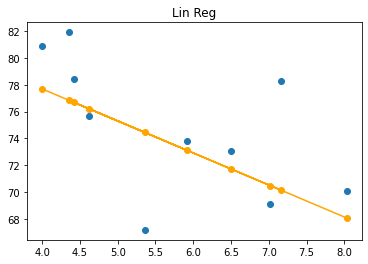

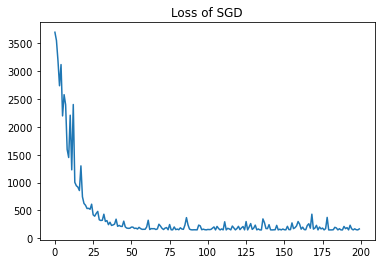

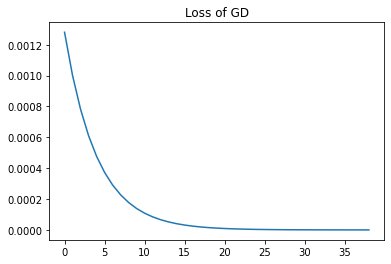

In [5]:
x = df['Mishandled baggage (per 1000 passengers)']
y = df['Percentage On Time Arrivals']
result = sgd(x,y,0.01,0.0001)
result0 = float(result[1][0])
result1 = float(result[1][1])
loss = result[0]

gd = gradient_descent(x,y,0.05,0.0000001)
gd_loss = gd[3]
gd_x = np.arange(len(gd_loss))


y_pre = x*result1 + result0
plt.title('Lin Reg')
plt.scatter(x, y)
plt.plot(x, y_pre, color='Orange')
plt.scatter(x, y_pre, color='Orange')
plt.show()

x = np.arange(len(loss))
plt.plot(x,loss)
plt.title('Loss of SGD')
plt.show()

plt.plot(gd_x, gd_loss)
plt.title('Loss of GD')
plt.show()

$ \theta_j := \theta_j -\alpha (h_{\theta}(x{(i)})-y{(i)})x_j^{(i)} $

### Exercise 2: 
Once you have the algorithm working, create a 2D (theta_0, theta_1) plot of both the GD and SGD algorithms. You will see the SGD algorithm take a more meandering path. To speed up the plotting, you will probably only want to plot every 100th point. (You can do this by creating a separate j counting variable and only plot the point if j % 100 == 0.